# Métodos Numéricos II. Práctica 2.

**Autor:** Arturo Olivares Martos
***

- **Asignatura:** Métodos Numéricos II.
- **Curso Académico:** 2024-25.
- **Grado:** Doble Grado en Ingeniería Informática y Matemáticas.
- **Grupo:** Único.
- **Profesor:** Juan Antonio Villegas Recio
- **Descripción:** Práctica 2 de la asignatura Métodos Numéricos II.
<!--- **Fecha:** 17 de abril de 2023. -->
<!-- - **Duración:** -->

En primer lugar, importamos las librerías necesarias para la práctica.

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from random import random

## Ejercicio 1


> **Ejercicio 1:** Determine las fórmulas de derivación numéricas con los datos de interpolación  
> 
> a) $(a-h,f(a-h))$ y $(a,f(a))$,
> 
> b) $(a-h,f(a-h))$ y $(a+h,f(a+h))$. 
> 
> ¿Qué fórmulas de derivación numérica se obtiene en cada caso?

Definimos en primer lugar los símbolos necesarios.

In [3]:
f = sp.Function('f')
a,h,x = sp.symbols('a,h,x')

#### Apartado a)

Para el primer apartado, el polinomio de interpolación es el siguiente:

In [4]:
x_values = [a-h,a]
y_values = [f(xi) for xi in x_values]

pol = y_values[0] + (x-x_values[0])*(y_values[1]-y_values[0])/(x_values[1]-x_values[0])
pol

f(a - h) + (f(a) - f(a - h))*(-a + h + x)/h

Veamos que efectivamente pasa por los nodos deseados.

In [5]:
print(f"x\t|\tf(x)")
print("-"*30)
for xi in x_values:
    print(f"{xi}\t|\t{pol.subs({x:xi})}")

x	|	f(x)
------------------------------
a - h	|	f(a - h)
a	|	f(a)


Comprobemos ahora por tanto la fórmula de derivación numérica que obtenemos. Como cabía esperar, se trata de la fórmula regresiva.

In [6]:
sp.diff(pol,x)

(f(a) - f(a - h))/h

#### Apartado b)

Para el segundo apartado, el polinomio de interpolación es el siguiente:

In [7]:
x_values = [a-h,a+h]
y_values = [f(xi) for xi in x_values]

pol = y_values[0] + (x-x_values[0])*(y_values[1]-y_values[0])/(x_values[1]-x_values[0])
pol

f(a - h) + (-f(a - h) + f(a + h))*(-a + h + x)/(2*h)

Veamos que efectivamente pasa por los nodos deseados.

In [8]:
print(f"x\t|\tf(x)")
print("-"*30)
for xi in x_values:
    print(f"{xi}\t|\t{pol.subs({x:xi})}")

x	|	f(x)
------------------------------
a - h	|	f(a - h)
a + h	|	f(a + h)


Comprobemos ahora por tanto la fórmula de derivación numérica que obtenemos. Como cabía esperar, se trata de la fórmula centrada.

In [9]:
sp.diff(pol,x)

(-f(a - h) + f(a + h))/(2*h)

## Ejercicio 2

> **Ejercicio 2:** Codifica una función para calcular la fórmula de derivación de tipo interpolatorio obtenida al derivar el polinomio interpolador en una lista de nodos que acepte como argumento. Añade un argumento opcional que sea el orden de la derivada a calcular. Comprueba el correcto funcionamiento de esta función con los ejemplos mostrados hasta el momento.

In [10]:
from sympy.polys.polyfuncs import interpolate
def derivacion_interpolatoria(x_values, orden=1):
    """
    Función que obtiene la fórmula de derivación de tipo interpolatorio en los nodos x_values evaluada en el punto a.

    Args:
        x_values (list): Lista de nodos donde se evalúa la función.
        orden (int): Orden de la derivada a calcular. Por defecto es 1.
    Returns:
        sp.Expr: Expresión simbólica de la derivada interpolatoria evaluada en el punto a.
    """

    # Definimos la variable simbólica
    x = sp.symbols('x')

    # Obtenemos los valores de la función en los nodos
    y_values = [f(xi) for xi in x_values]

    # Obtenemos lista de pares (xi, f(xi))
    data = list(zip(x_values, y_values))
    
    # Interpolamos la función en los nodos
    pol = interpolate(data, x)

    # Calculamos la derivada de orden 'orden' del polinomio interpolante
    # Evaluamos la derivada en el punto 'a'
    derivada = sp.diff(pol, x, orden).subs({x:a}).simplify() 

    return derivada


Comprobemos que efectivamente funciona con varios ejemplos.

In [11]:
# Lista de Ejemplos de nodos
x_values_list = [
    [a-h, a],
    [a, a+h],
    [a-h, a+h],
    [a-h, a, a+h],
    [a, a+h, a+2*h],
    [a-2*h, a-h, a, a+h, a+2*h]
]


for x_values in x_values_list:
    print(f"Nodos: {x_values}")

    for orden in range(1, len(x_values)):
        print(f"- Orden de la derivada: {orden}")
        # Muestra la derivada interpolatoria
        display(derivacion_interpolatoria(x_values, orden))
    
    print("-" * 70 + "\n")

Nodos: [a - h, a]
- Orden de la derivada: 1


(f(a) - f(a - h))/h

----------------------------------------------------------------------

Nodos: [a, a + h]
- Orden de la derivada: 1


(-f(a) + f(a + h))/h

----------------------------------------------------------------------

Nodos: [a - h, a + h]
- Orden de la derivada: 1


(-f(a - h) + f(a + h))/(2*h)

----------------------------------------------------------------------

Nodos: [a - h, a, a + h]
- Orden de la derivada: 1


(-f(a - h) + f(a + h))/(2*h)

- Orden de la derivada: 2


(-2*f(a) + f(a - h) + f(a + h))/h**2

----------------------------------------------------------------------

Nodos: [a, a + h, a + 2*h]
- Orden de la derivada: 1


(-3*f(a) + 4*f(a + h) - f(a + 2*h))/(2*h)

- Orden de la derivada: 2


(f(a) - 2*f(a + h) + f(a + 2*h))/h**2

----------------------------------------------------------------------

Nodos: [a - 2*h, a - h, a, a + h, a + 2*h]
- Orden de la derivada: 1


(f(a - 2*h) - 8*f(a - h) + 8*f(a + h) - f(a + 2*h))/(12*h)

- Orden de la derivada: 2


(-30*f(a) - f(a - 2*h) + 16*f(a - h) + 16*f(a + h) - f(a + 2*h))/(12*h**2)

- Orden de la derivada: 3


(-f(a - 2*h)/2 + f(a - h) - f(a + h) + f(a + 2*h)/2)/h**3

- Orden de la derivada: 4


(6*f(a) + f(a - 2*h) - 4*f(a - h) - 4*f(a + h) + f(a + 2*h))/h**4

----------------------------------------------------------------------



## Ejercicio 3

> **Ejercicio 3**: Repita el procedimiento visto en la práctica con la fórmula para la segunda derivada
> $$
> f''(a) \approx \frac{f(a+h)-2f(a)+f(a-h)}{h^2}
> $$
> y compruebe que tiene orden de aproximación 2.

Comprobamos en primer lugar el grado de exactitud de la fórmula. Esto lo haremos comprobando sobre la base de $\mathbb{P}_n$.

In [12]:
def orden_exactitud(f, a):
    """
    Función que obtiene el orden de exactitud de la fórmula de derivación.

    Args:
        f (function): Función cuya derivada se va a aproximar.
        a (float): Punto donde se evalúa la función.
    Returns:
        int: Orden de exactitud de la fórmula de derivación.
    """
    
    # Definimos la variable simbólica
    x = sp.symbols('x')

    # Inicializamos el orden y la variable de control para detectar la exactitud
    exactitudDetectada = False
    orden = 0
    while(not exactitudDetectada):
        exacto = sp.diff(x**orden, x, 2).subs({x: a})
        aproximado = f(lambda x:x**orden).subs({x: a}).simplify()
        
        exactitudDetectada = exacto != aproximado
        if not exactitudDetectada:
            orden += 1
    
    orden -= 1 # El orden de exactitud es el último en el que no se detectó la diferencia
    
    return orden

In [13]:
formula_der = lambda f: (f(a+h) -2*f(a) + f(a-h))/(h**2)
display(formula_der(f))
print(f"Orden de exactitud: {orden_exactitud(formula_der, a)}")


print(f"-"*70 + "\n")

formula_der = lambda f: (-30*f(a)-f(a-2*h)+16*f(a-h)+16*f(a+h)-f(a+2*h))/(12*h**2)
display(formula_der(f))
print(f"Orden de exactitud: {orden_exactitud(formula_der, a)}")

(-2*f(a) + f(a - h) + f(a + h))/h**2

Orden de exactitud: 3
----------------------------------------------------------------------



(-30*f(a) - f(a - 2*h) + 16*f(a - h) + 16*f(a + h) - f(a + 2*h))/(12*h**2)

Orden de exactitud: 5


Buscamos ahora tratar el orden de aproximación de la fórmula dada para este ejercicio.
Trabajamos con las series de Taylor de los puntos $a-h$, $a$ y $a+h$. Empleamos además $n=5$ puesto que este es el primero que nos garantiza que el error no se anula.

In [14]:
n=5
fseries = f(x).series(x,a,n).removeO()      # Fórmula de Taylor de orden n

fmas = fseries.subs({x:(a+h)})
fmenos = fseries.subs({x:(a-h)})

sp.expand((fmas -2*f(a) + fmenos)/h**2)

h**2*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/12 + Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)

Vemos por tanto que el error es de orden $O(h^2)$, como se pedía comprobar.

## Ejercicio 4

> **Ejercicio 4:** Utilice la función $f(x) = \dfrac{e^{\cos(x)}}{x^2+1}$ y el valor $a=1$ y compruebe que ocurre el mismo hecho que el descrito en teoría. Repita el procedimiento utilizando la fórmula de diferencia centrada en lugar de la de diferencia progresiva y comenta las diferencias observadas.

Codificamos la siguiente función, que nos será de ayuda para poder realizar más pruebas.

In [15]:
def errores(f, a, nodos, exp_min, orden):
    """
    Función que muestra por mantalla información para analizar los errores de la aproximación de la derivada mediante la interpolación.
    Args:
        f (function): Función cuya derivada se va a aproximar.
        a (float): Punto donde se evalúa la función.
        nodos (list): Lista de nodos empleados para la aproximación. Dependen de h.
        exp_min (int): Exponente mínimo para el error. Debe ser positivo. Se usará desde h=0 hasta h=10**{-exp_min}.
        orden (int): Orden de la derivada a calcular.
    """
    
    # Definimos los encabezados de la tabla
    v_exacto = sp.diff(f(x), x).subs({x: a})
    print(f"Valor exacto: {sp.N(v_exacto)}\n")

    headers = ["h", "Valor Aproximado", "Error"]
    column_width = 30  # Ancho fijo para cada columna

    # Imprimimos la cabecera de la tabla
    print(f"{headers[0]:<{column_width}}|{headers[1]:<{column_width}}|{headers[2]:<{column_width}}")
    print("-" * (column_width * len(headers) + len(headers) - 1))  # Línea divisoria

    for exp in range (exp_min+1):

        valh = 10**(-exp)
        
        # Aproximación de la derivada
        v_aproximado = derivacion_interpolatoria(nodos).subs({x: a, h: valh})
        
        # Error
        error = abs(v_exacto - v_aproximado)

        v_aproximado_float = float(sp.N(v_aproximado))
        error_float = float(sp.N(error))

        # Imprimimos los resultados
        print(f"{valh:<{column_width}}|{v_aproximado_float:<{column_width}.15f}|{error_float:<{column_width}.15f}")

Comprobemos en primer lugar el funcionamiento con la fórmula progresiva. Como vemos, no converge a la derivada, y a partir de $h=10^{-8}$, el error comienza a crecer.

In [16]:
a = 1
f = lambda x: sp.exp(sp.cos(x))/(x**2 + 1)
nodos = [a,a+h]

errores(f, a, nodos, 25, 1)

Valor exacto: -1.58046613519819

h                             |Valor Aproximado              |Error                         
--------------------------------------------------------------------------------------------
1                             |-0.726346167289936            |0.854119967908255             
0.1                           |-1.460627685591648            |0.119838449606543             
0.01                          |-1.568253632614890            |0.012212502583302             
0.001                         |-1.579243008009281            |0.001223127188911             
0.0001                        |-1.580343804169461            |0.000122331028731             
1e-05                         |-1.580453901918251            |0.000012233279941             
1e-06                         |-1.580464911712611            |0.000001223485580             
1e-07                         |-1.580466015453432            |0.000000119744759             
1e-08                         |-1.580

Comprobamos ahora el funcionamiento con la fórmula centrada. Como vemos, los errores comienzan a crecer a partir de $h=10^{-6}$. No obstante, el error es mucho menor que en el caso anterior, puesto que el numerador se anula directamente.

In [17]:
a = 1
f = lambda x: sp.exp(sp.cos(x))/(x**2 + 1)
nodos = [a+h,a-h]

errores(f, a, nodos, 25, 1)

Valor exacto: -1.58046613519819

h                             |Valor Aproximado              |Error                         
--------------------------------------------------------------------------------------------
1                             |-1.293182572987265            |0.287283562210927             
0.1                           |-1.582434034457561            |0.001967899259370             
0.01                          |-1.580486414639010            |0.000020279440819             
0.001                         |-1.580466338052527            |0.000000202854335             
0.0001                        |-1.580466137226510            |0.000000002028319             
1e-05                         |-1.580466135220337            |0.000000000022145             
1e-06                         |-1.580466135131520            |0.000000000066672             
1e-07                         |-1.580466135742142            |0.000000000543951             
1e-08                         |-1.580

## Ejercicio 5

> **Ejercicio 5 (Implementación numérica de las fórmulas de derivación):** Implementa una función que acepte como argumentos una función en versión numérica `f`, un valor `a`, un valor `h`, un entero opcional `n` y un cuarto argumento que sea la fórmula de derivación numérica utilizada. La función deberá calcular la derivada `n`-ésima de la función `f` en el punto `a` utilizando la fórmula y el valor de `h` indicados. Las posibles fórmulas utilizadas deben incluir, al menos: diferencia regresiva, diferencia progresiva, diferencia centrada y diferencia centrada con 5 nodos. Para la función $$f(x) = \sin(\log(x^2+1)),$$ calcula el valor de $f'(-1)$, primero derivando una versión simbólica y obteniendo el valor exacto y después utilizando la función implementada con distintos valores de `h` y distintas fórmulas y comprueba las diferencias en la aproximación en cada caso.

Definimos en primer lugar cada una de las fórmulas de derivación numérica que vamos a utilizar. No podemos hacerlo de forma genérica, puesto que $f$ es numérica y no simbólica, por lo que no podemos utilizar la función `diff` de SymPy.

In [18]:
def diferencia_regresiva(f, a, h, orden=1):
    if (orden==0):
        return f(a)
    else:
        return (diferencia_regresiva(f, a, h, orden-1) - diferencia_regresiva(f, a-h, h, orden-1))/h
    

def diferencia_progresiva(f, a, h, orden=1):
    if (orden==0):
        return f(a)
    else:
        return (diferencia_progresiva(f, a+h, h, orden-1) - diferencia_progresiva(f, a, h, orden-1))/h

def diferencia_central(f, a, h, orden=1):
    if (orden==0):
        return f(a)
    else:
        return (diferencia_central(f, a+h, h, orden-1) - diferencia_central(f, a-h, h, orden-1))/(2*h)
    
def diferencia_central_5puntos(f, a, h, orden=1):
    if (orden==0):
        return f(a)
    else:
        numerador = (diferencia_central_5puntos(f, a-2*h, h, orden-1) - 
                     8*diferencia_central_5puntos(f, a-h, h, orden-1) + 
                     8*diferencia_central_5puntos(f, a+h, h, orden-1) - 
                     diferencia_central_5puntos(f, a+2*h, h, orden-1))
        return numerador/(12*h)

Una vez definidas, podemos representar la forma genérica de la función que nos pide el ejercicio.

In [19]:
def derivacion_numerica(f, a, h, formula, orden=1):
    """
    Función que calcula la derivada numérica de una función en un punto dado utilizando una fórmula de derivación.

    Args:
        f (function): Función cuya derivada se va a aproximar.
        a (float): Punto donde se evalúa la función.
        h (float): Paso para la aproximación.
        orden (int): Orden de la derivada a calcular. Por defecto es 1.
        formula (function): Fórmula de derivación a utilizar. Debe aceptar los parámetros (f, a, h, orden).

    Returns:
        float: Valor aproximado de la derivada en el punto 'a'.
    """
    
    return formula(f, a, h, orden)

Para realizar las pruebas, definimos además la siguiente función, que nos codifica la salida de una forma correcta.

In [20]:
def salida(f_Sym, f_Num, a, h, orden=1):
    """
    Función que muestra por pantalla la comparativa entre los distintos métodos de derivación numérica.as_integer_ratio
    Args:
        f_Sym (function): Función simbólica cuya derivada se va a aproximar.
        f_Num (function): Función numérica cuya derivada se va a aproximar.
        a (float): Punto donde se evalúa la función.
        h (float): Paso para la aproximación.
        orden (int): Orden de la derivada a calcular. Por defecto es 1.
    """

    valor_exacto = sp.diff(f_Sym(x), x).subs({x: a})

    dif_regresiva = derivacion_numerica(f_Num, a, h, diferencia_regresiva)
    dif_progresiva = derivacion_numerica(f_Num, a, h, diferencia_progresiva)
    dif_central = derivacion_numerica(f_Num, a, h, diferencia_central)
    dif_central_5puntos = derivacion_numerica(f_Num, a, h, diferencia_central_5puntos)


    print(f"Valor exacto de la derivada en x={a}: {valor_exacto}= {float(valor_exacto)}")
    print(f"Valor aproximado de la derivada en x={a} con h={h}:")

    decimales = 10

    print(f"\t- Diferencia regresiva        : {dif_regresiva:.{decimales}f}")
    print(f"\t- Diferencia progresiva       : {dif_progresiva:.{decimales}f}")
    print(f"\t- Diferencia central          : {dif_central:.{decimales}f}")
    print(f"\t- Diferencia central 5 puntos : {dif_central_5puntos:.{decimales}f}")

    print(f"Errores:")
    print(f"\t- Diferencia regresiva        : {abs(valor_exacto - dif_regresiva):.{decimales}f}")
    print(f"\t- Diferencia progresiva       : {abs(valor_exacto - dif_progresiva):.{decimales}f}")
    print(f"\t- Diferencia central          : {abs(valor_exacto - dif_central):.{decimales}f}")
    print(f"\t- Diferencia central 5 puntos : {abs(valor_exacto - dif_central_5puntos):.{decimales}f}")

Definimos ahora la función que nos pide el ejercicio. Definimos tanto la función numérica como la simbólica, puesto que la segunda nos proporcionará el valor exacto de la derivada.

In [21]:
def f(x):
    """
    Función numérica a tratar.
    Args:
        x (float): Valor de entrada.
    Returns:
        float: Valor de la función en 'x'.
    """
    return np.sin(np.log(x**2 + 1))

def f_Sym(x):
    """
    Función simbólica a tratar.
    Args:
        x (sympy.Symbol): Variable simbólica.
    Returns:
        sympy.Expr: Expresión simbólica de la función en 'x'.
    """
    return sp.sin(sp.log(x**2 + 1))

In [22]:
a = -1.0
salida(f_Sym, f, a, 0.1, 1)
print("\n" + "-"*70 + "\n")
salida(f_Sym, f, a, 0.01, 1)
print("\n" + "-"*70 + "\n")
salida(f_Sym, f, a, 0.001, 1)
print("\n" + "-"*70 + "\n")
salida(f_Sym, f, a, 0.0001, 1)
print("\n" + "-"*70 + "\n")


Valor exacto de la derivada en x=-1.0: -0.769238901363972= -0.7692389013639721
Valor aproximado de la derivada en x=-1.0 con h=0.1:
	- Diferencia regresiva        : -0.7349508034
	- Diferencia progresiva       : -0.7983892630
	- Diferencia central          : -0.7666700332
	- Diferencia central 5 puntos : -0.7692571660
Errores:
	- Diferencia regresiva        : 0.0342880980
	- Diferencia progresiva       : 0.0291503616
	- Diferencia central          : 0.0025688682
	- Diferencia central 5 puntos : 0.0000182647

----------------------------------------------------------------------

Valor exacto de la derivada en x=-1.0: -0.769238901363972= -0.7692389013639721
Valor aproximado de la derivada en x=-1.0 con h=0.01:
	- Diferencia regresiva        : -0.7660186825
	- Diferencia progresiva       : -0.7724078367
	- Diferencia central          : -0.7692132596
	- Diferencia central 5 puntos : -0.7692389033
Errores:
	- Diferencia regresiva        : 0.0032202189
	- Diferencia progresiva       : 0.003

## Ejercicio 6

> **Ejercicio 6:** Siguiendo el modelo y el código proporcionado para la fórmula de los rectángulos a la izquierda, codifique las fórmulas compuestas de los rectángulos a la derecha y centrados. Calcule con estas dos fórmulas la aproximación de $\displaystyle\int_0^1 (x^2+1)dx$, el error cometido y represente al menos una de las dos gráficamente.

Buscamos en primer lugar codificar la función de los rectángulos a la derecha y centrados. Para ello, y buscando siempre la mayor generalización, buscamos una función que, en función de cierto parámetro recibido, nos devuelva la función deseada. Sabemos que hay $n$ intervalos formados por $n+1$ nodos equiespaciados en el intervalo $[a,b]$. Fijado $k\in \{0,\cdots, n\}$, en el intervalo $I_k=[x_k,x_{k+1}]$ aplicaremos una fórmula de integración simple. Para ello, en realidad se integrará el polinomio de interpolación de $f$ en el intervalo $I_k$; pero es necesario saber qué nodos vamos a emplear en dicho intervalo.

Por todo ello, emplearemos un parámetro que será una lista denominada `diff_nodos`, que especificará qué nodos emplearemos en cada intervalo. En el intervalo $I_k=[x_k,x_{k+1}]$, se emplearán tantos nodos como elementos tenga la lista `diff_nodos`. Para cada elemento $i$ de la lista, se empleará el nodo $x_k+i\cdot h$, donde $h=\frac{b-a}{n}$ es la longitud del intervalo. Por tanto:
- Si `diff_nodos=[0]`, tan solo se empleará el nodo $x_k$, y se obtendrá la fórmula de los rectángulos a la izquierda.
- Si `diff_nodos=[1]`, tan solo se empleará el nodo $x_{k+1}$, y se obtendrá la fórmula de los rectángulos a la derecha.
- Si `diff_nodos=[0,1]`, se emplearán ambos nodos, y se obtendrá la fórmula del trapecio.
- Si `diff_nodos=[0,0.5,1]`, se emplearán los nodos $x_k$, $x_{k+1}$ y el punto medio del intervalo, y se obtendrá la fórmula de Simpson.

Esta variable nos será especialmente útil en la representación gráfica. En este caso, puesto que no podemos directamente calcular integrales de polinomios arbitarios (tan solo de constantes), la siguiente función tan solo la codificaremos para recibir un único valor en dicha lista (es decir, integrar constantes, que sabemos que es el valor de la integral multiplicado por la longitud del intervalo). En caso de que se reciba una lista con más de un elemento, se devolverá un error.

Podríamos coficiarla para que, en cada intervalo, calculase el polinomio de interpolación con los nodos indicados, y luego calculase la integral de dicho polinomio (tendríamos que emplear métodos de integración numérica para ello). Para evitar el uso de métodos de integración numérica, limitamos a que tan solo pueda recibir un único valor en la lista `diff_nodos`. En caso de que se reciba una lista con más de un elemento, se devolverá un error.

In [23]:
def formula_compuesta_un_nodo(f, a, b, n, diff_nodos):
    """
    Función que calcula la integral numérica de una función en un intervalo dado utilizando una fórmula compuesta que usa solo un nodo.

    Args:
        f (function): Función cuya integral se va a aproximar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n (int): Número de subintervalos. Se emplearán n+1 nodos.
        diff_nodos (list): Lista de nodos donde se evalúa la función. Explicado anteriormente. Solo contiene un elemento

    Returns:
        float: Valor aproximado de la integral en el intervalo [a, b].
    """

    # Comprobación de que diff_nodos tiene un solo elemento y está entre 0 y 1
    if len(diff_nodos) != 1 or 0> diff_nodos[0] or diff_nodos[0] > 1:
        raise ValueError("diff_nodos debe contener un solo elemento entre 0 y 1")

    h = (b - a) / n                 # Paso para la aproximación
    nodos = np.linspace(a, b, n+1)  # Generamos los nodos en el intervalo [a, b]

    puntos = []  # Inicializamos la lista de puntos a evaluar
    if diff_nodos[0] == 0:  # Punto izquierdo
        puntos = nodos[:-1]  # Todos menos el último
    elif diff_nodos[0] == 1:  # Punto derecho
        puntos = nodos[1:]   # Todos menos el primero
    else:  # Punto intermedio (como el centrado)
        puntos = nodos[:-1] + diff_nodos[0]*h  # Suma vectorizada
    
    res = h*np.sum(f(puntos))  # Aproximación de la derivada

    return res

Una vez que tenemos la función, podemos definir fácilmente los métodos de integración de rectángulo izquierdo, derecho y centrado.

In [24]:
def rectangulo_izquierdo(f, a, b, n):
    """
    Función que calcula la integral de una función en un intervalo dado utilizando el método del rectángulo izquierdo.

    Args:
        f (function): Función a integrar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n (int): Número de subintervalos.

    Returns:
        float: Valor aproximado de la integral en el intervalo [a, b].
    """
    
    return formula_compuesta_un_nodo(f, a, b, n, [0])

def rectangulo_derecho(f, a, b, n):
    """
    Función que calcula la integral de una función en un intervalo dado utilizando el método del rectángulo derecho.

    Args:
        f (function): Función a integrar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n (int): Número de subintervalos.

    Returns:
        float: Valor aproximado de la integral en el intervalo [a, b].
    """
    
    return formula_compuesta_un_nodo(f, a, b, n, [1])

def rectangulo_centrado(f, a, b, n):
    """
    Función que calcula la integral de una función en un intervalo dado utilizando el método del rectángulo centrado.

    Args:
        f (function): Función a integrar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n (int): Número de subintervalos.

    Returns:
        float: Valor aproximado de la integral en el intervalo [a, b].
    """
    
    return formula_compuesta_un_nodo(f, a, b, n, [0.5])

Comprobamos ahora los tres resultados con el ejemplo propuesto.

In [25]:
def f(x):
    """
    Función que calcula numéricamente el valor de la función f(x) = 1+x^2.

    Args:
        x (float): Valor en el que se evalúa la función.

    Returns:
        float: Valor de la función f(x).
    """

    return 1 + x**2

Comparamos ahora los resultados obtenidos con los métodos de rectángulo izquierdo, derecho y centrado. Como vemos, el método de rectángulo centrado es el que más se aproxima al valor real de la integral. El método de rectángulo izquierdo es el que menos se aproxima, aunque no por mucho. El método de rectángulo derecho se encuentra en un punto intermedio entre ambos.

In [26]:
valor_exacto = sp.integrate(f(x), (x, 0, 1))

n=1000
aproximacion_izquierda = rectangulo_izquierdo(f, 0, 1, n)
aproximacion_derecha = rectangulo_derecho(f, 0, 1, n)
aproximacion_centrada = rectangulo_centrado(f, 0, 1, n)


print(f"- Valor exacto: {valor_exacto} = {float(valor_exacto)}")
print(f"- Rectángulo izquierdo:")
print(f"\t- Aproximación: {aproximacion_izquierda}")
print(f"\t- Error: {abs(valor_exacto - aproximacion_izquierda)}")
print(f"- Rectángulo derecho:")
print(f"\t- Aproximación: {aproximacion_derecha}")
print(f"\t- Error: {abs(valor_exacto - aproximacion_derecha)}")
print(f"- Rectángulo centrado:")
print(f"\t- Aproximación: {aproximacion_centrada}")
print(f"\t- Error: {abs(valor_exacto - aproximacion_centrada)}")


- Valor exacto: 4/3 = 1.3333333333333333
- Rectángulo izquierdo:
	- Aproximación: 1.3328335000000002
	- Error: 0.000499833333333033
- Rectángulo derecho:
	- Aproximación: 1.3338335
	- Error: 0.000500166666666635
- Rectángulo centrado:
	- Aproximación: 1.3333332500000001
	- Error: 8.33333331229369E-8


Como vemos, a priori la más exacta es la del rectángulo centrado. No obstante, buscamos ver gráficamente qué ocurre. Para ello, representamos la función y los rectángulos que se han empleado en cada caso. Notemos que ya no tenemos la limitación de que la lista `diff_nodos` tenga un único elemento, puesto que no es necesario calcular integrales en este caso, tan solo representaremos las áreas. No obstante, sí es necesario comprobar que todos los elementos de `diff_nodos` están en el intervalo $[0,1]$.

Para la gráfica, empleamos la siguiente función, ya empleada en la Práctica 1:

In [27]:
import inspect
import re

def obtener_funcion(f):
    """
    Obtiene la función como string a partir de su definición.

    Args:
        f (function): Función a convertir a string.
    Returns:
        str: Representación en string de la función.
    """

    source = inspect.getsource(f)
    expression = source.split('return')[1].strip()

    # Si pone NewtonHorner, se trata de un polinomio
    if 'NewtonHorner' in expression:
        coefs = expression.split('[')[1].split(']')[0].split(',')
        # Invertimos los coeficientes para que el último sea el de mayor grado
        coefs = coefs[::-1]
        expression = ""
        for i in range(len(coefs)):
            if coefs[i] != '0':
                coef = coefs[i]
                if coef == '1' or coef == '-1':
                    coef = ''
                if i == 0:
                    expression = f"{coef}" + expression
                elif i == 1:
                    expression = f"{coef}x" + expression
                else:
                    expression = f"{coef}x^({i})" + expression

                # Poner un signo + o - entre los términos si no los lleva ya
                if i != len(coefs) - 1:
                    if expression[0] != '-' and expression[0] != '+':
                        if sign(float(coefs[i])) == 1:
                            expression = f"+ {expression}"
                        else:
                            expression = f"- {expression}"
        



    # Resto, necesario para los que no son polinomios
    expression = expression.replace('(', '{')
    expression = expression.replace(')', '}')
    expression = expression.replace('{{', '\\left(')
    expression = expression.replace('}}', '\\right)')
    expression = expression.replace('**', '^')
    expression = expression.replace('*', '\\cdot ')
    expression = expression.replace('np.exp', 'e^')
    expression = expression.replace('np.cos', '\\cos ')
    expression = expression.replace('np.sin', '\\sin ')
    expression = expression.replace('np.pi', '\\pi ')

    #{algo}/{algo} se convierte en \frac{algo}{algo}
    expression = re.sub(r'{([^{}]+)}/{([^{}]+)}', r'\\frac{\1}{\2}', expression)


    return expression

In [28]:
def representa_formula_compuesta(f,a,b,n,diff_nodos, title=None):
    """
    Función que representa gráficamente la fórmula compuesta correspondiente, especificada por diff_nodos.

    Args:
        f (function): Función a integrar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n (int): Número de subintervalos. Se emplearán n+1 nodos.
        diff_nodos (list): Lista de nodos donde se evalúa la función. Explicado anteriormente.
        title (str): Título del gráfico. Por defecto es None.
    """

    # Comprobación de que todos los elemenos de diff_nodos están entre 0 y 1
    if not all(0 <= i <= 1 for i in diff_nodos):
        raise ValueError("diff_nodos debe contener elementos entre 0 y 1")

    num_values = 100
    h = (b-a)/n
    x_values = np.linspace(float(a),float(b),num_values)
    y_values = f(x_values)
    x_extremos_intervalo = np.linspace(a,b,n+1)
    x_nodos = []
    y_nodos = []

    fig,ax = plt.subplots(figsize=(8,8))
    ax.plot(x_values,y_values,'k',label=f"$f(x)={obtener_funcion(f)}$", linewidth=2)

    # Dibujamos el rectángulo en cada intervalo
    for k in range(n):
        x_values_intervalo = np.linspace(float(x_extremos_intervalo[k]),float(x_extremos_intervalo[k+1]),num_values)
        x_interpol = []
        for i in diff_nodos:
            # Si i es entero, se añade el nodo k+i
            if (int(i) == i):
                x_interpol.append(x_extremos_intervalo[k+i])
            
            # Si i es decimal, se añade el nodo k, +h*i
            else:
                x_interpol.append(x_extremos_intervalo[k]+h*i)

        y_interpol = f(np.array(x_interpol))


        # Se añaden los nodos a la lista de nodos que se dibujará
        x_nodos.extend(x_interpol)
        y_nodos.extend(y_interpol)

        # Se calcula el polinomio de interpolación
        y_values_intervalo = np.interp(x_values_intervalo, np.array(x_interpol), np.array(y_interpol))
        
        ax.fill_between(x_values_intervalo,0,y_values_intervalo)
    

    ax.plot(x_nodos,y_nodos,'ro')

    # Mostrar leyenda
    ax.legend(loc='best')

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(title)

Veamos ahora qué ocurre con los tres tipos de fórmulas compuestas vistos. Evidentemente, si empleásemos el mismo valor de $n$ que antes no podríamos ver la diferencia entre los tres métodos. Por tanto, emplearemos un valor de $n$ mucho menor, que nos permita ver visualmente los rectángulos empleados.

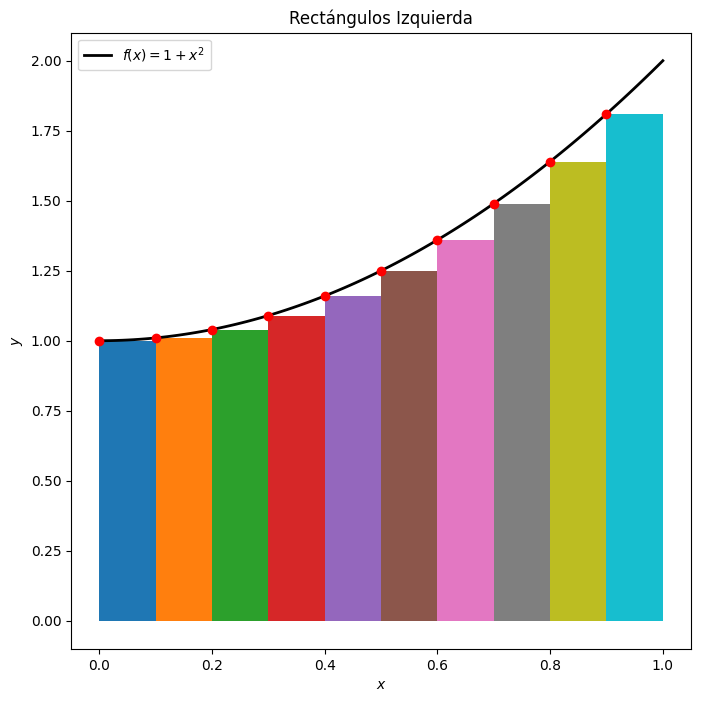

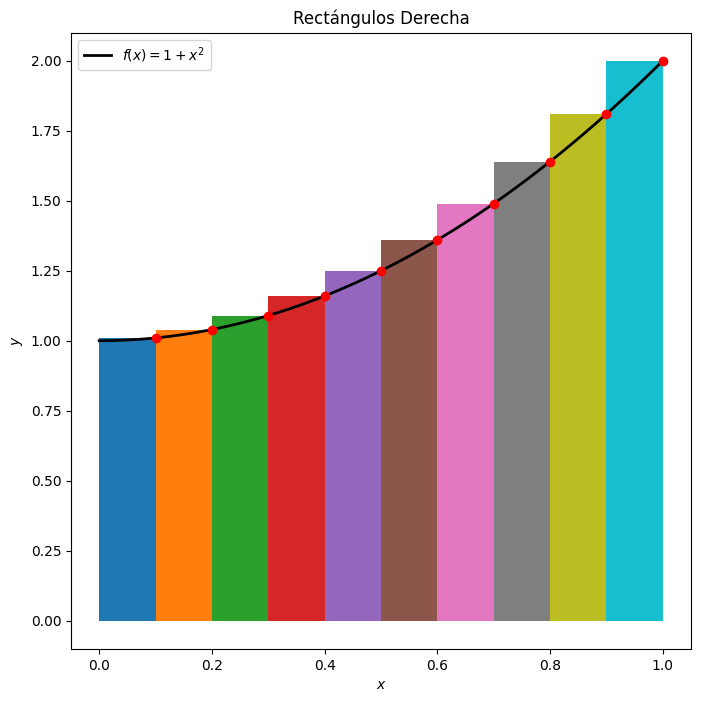

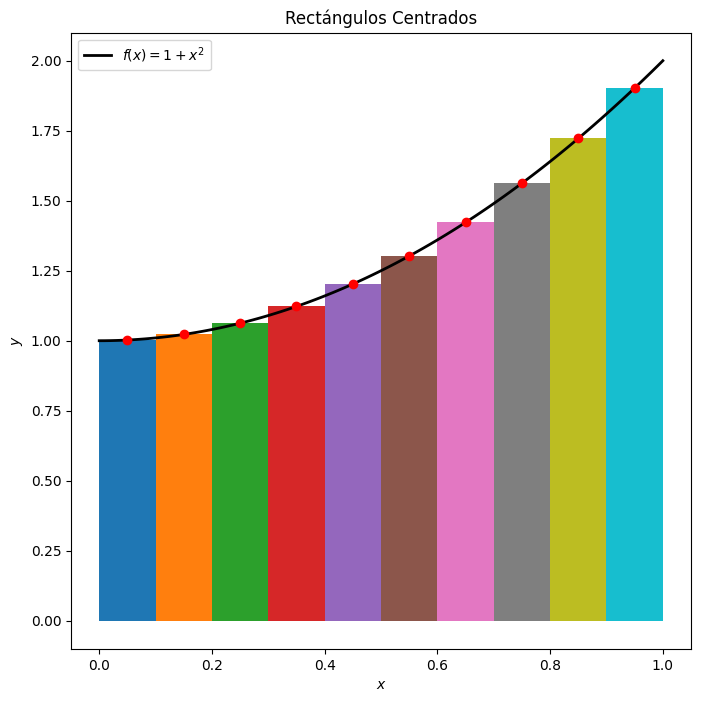

In [29]:
n=10
representa_formula_compuesta(f,0,1,n,[0], "Rectángulos Izquierda")
representa_formula_compuesta(f,0,1,n,[1], "Rectángulos Derecha")
representa_formula_compuesta(f,0,1,n,[0.5], "Rectángulos Centrados")

Como vemos, el método de rectángulo centrado es el que más se aproxima al valor real de la integral, puesto que los errores se compensan entre sí.

## Ejercicio 7

> **Ejercicio 7:** Implemente una función que calcule la integral de una función $f$ en el intervalo $[a,b]$ usando la fórmula de Simpson compuesta, parametrizando también el número de subintervalos utilizados (se premia la eficiencia). Represente gráficamente la fórmula de Simpson compuesta análogamente a la representación mostrada para la fórmula de los trapecios compuesta.

Comenzamos con la representación gráfica, puesto que ya está codificada la función. Sabemos que, en cada subintervalo, la fórmula de Simpson emplea tres nodos, los dos extremos y el punto medio. Por tanto, la gráfica queda:

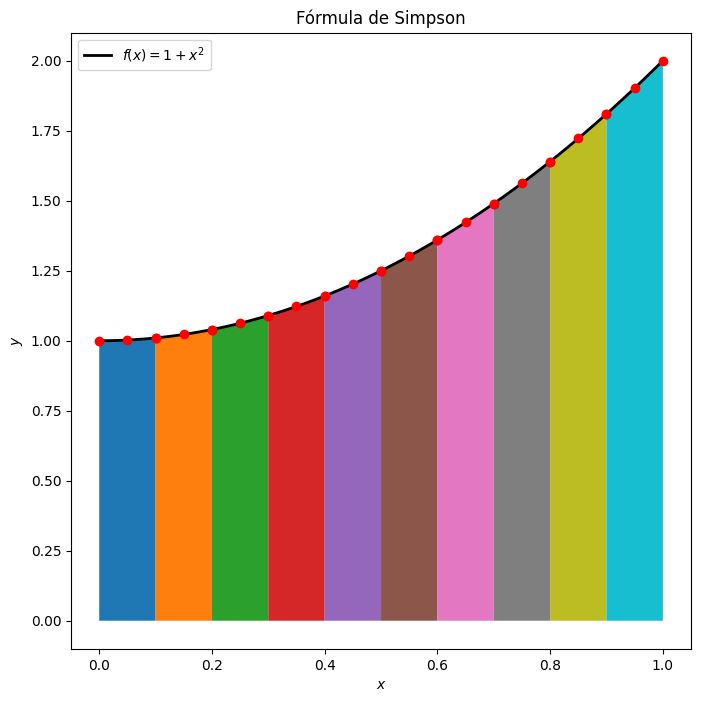

In [30]:
representa_formula_compuesta(f,0,1,10,[0,0.5,1], "Fórmula de Simpson")


Como vemos, la aproximación parece ser exacta. De hecho, lo será, puesto que Simpson por construcción es exacto en $\mathbb{P}_2$. No obstante, veámoslo tras codificar la función. No realizaremos el desarrollo teórico (puesto que esto se ve en la parte teórica de la asignatura), pero si buscamos la fórmula de Simpson compuesta para $f$ en el intervalo $[a,b]$ con $n$ intervalos, esta es:
$$
\int_a^b f(x)dx \approx \frac{h}{6}\left(f(a)+4\sum_{i=1}^n f\left(x_i + \frac{h}{2}\right)+2\sum_{i=1}^{n-1} f\left(x_i\right)+f(b)\right)
$$

Notemos además que asumiendo $n$ como el doble de los intervalos buscados (tendremos por tanto $h$ como la mitad de la longitud del intervalo), la fórmula de Simpson compuesta se convierte en:
$$
\int_a^b f(x)dx \approx \frac{h}{3}\left(f(a)+4\sum_{i=1}^{\frac{n}{2}} f\left(x_{2i-1}\right)+2\sum_{i=1}^{\frac{n}{2}-1} f\left(x_{2i}\right)+f(b)\right)
$$

Codificamos por tanto así la función.

In [31]:
def formula_simpson_compuesta(f, a, b, n):
    """
    Función que calcula la integral numérica de una función en un intervalo dado utilizando una la fórmula de Simpson compuesta.

    Args:
        f (function): Función cuya integral se va a aproximar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n (int): Número de subintervalos. Se emplearán n+1 nodos.

    Returns:
        float: Valor aproximado de la integral en el intervalo [a, b].
    """

    n*=2

    h = (b - a) / n                 # Paso para la aproximación
    nodos = np.linspace(a, b, n+1)  # Generamos los nodos en el intervalo [a, b]

    suma_impares = np.sum(f(nodos[1:n+1:2]))    # Suma de los nodos impares
    suma_pares = np.sum(f(nodos[2:n-1:2]))      # Suma de los nodos pares. El -1 es para evitar el último nodo

    res = f(a) + f(b) + 4*suma_impares + 2*suma_pares
    res = (h/3)*res  # Aproximación de la integral

    return res

Comprobamos ahora el funcionamiento de la función con el ejemplo propuesto. Como antes mencionábamos, la aproximación es exacta. Esto es debido a que la función $f$ es un polinomio de grado 2, y por tanto la fórmula de Simpson compuesta es exacta. En este caso, el error es cero.

In [32]:
valor_exacto = sp.integrate(f(x), (x, 0, 1))
valor_aproximado = formula_simpson_compuesta(f, 0, 1, 10)
print(f"- Valor exacto: {valor_exacto} = {float(valor_exacto)}")
print(f"- Aproximación: {valor_aproximado}")
print(f"- Error: {abs(valor_exacto - valor_aproximado)}")

- Valor exacto: 4/3 = 1.3333333333333333
- Aproximación: 1.3333333333333333
- Error: 0


## Ejercicio 8

>**Ejercicio 8:** Realice una comparativa entre los errores cometidos al aproximar funciones potencias sucesivas $x^i$, con $i=1,2,3,\ldots$ en el intervalo $[0,1]$ mediante las fórmulas de los trapecios y de Simpson compuestas con diferentes valores de $h$; e inducir de ahí, los posibles órdenes de exactitud (a partir de los valores de $i$ que proporcionen valores exactos de la integral). No deje de tener en cuenta los posibles errores de redondeo, inevitables en todo cálculo realizado con ordenador.

La fórmula del trapecio compuesta en el intervalo $[a,b]$ con $n$ intervalos es:
$$
\int_a^b f(x)dx \approx \frac{h}{2}\left(f(a)+2\sum_{i=1}^{n-1} f\left(x_i\right)+f(b)\right)
$$

In [33]:
def formula_trapecio_compuesta(f, a, b, n):
    """
    Función que calcula la integral numérica de una función en un intervalo dado utilizando una la fórmula del Trapecio compuesta.

    Args:
        f (function): Función cuya integral se va a aproximar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n (int): Número de subintervalos. Se emplearán n+1 nodos.

    Returns:
        float: Valor aproximado de la integral en el intervalo [a, b].
    """


    h = (b - a) / n                 # Paso para la aproximación
    nodos = np.linspace(a, b, n+1)  # Generamos los nodos en el intervalo [a, b]

    res = f(a) + f(b) + 2*np.sum(f(nodos[1:n]))  # Suma de los nodos intermedios
    res = (h/2)*res  # Aproximación de la integral

    return res

Antes de comenzar con la comparativa, comprobamos el funcionamiento de la función de los trapecios compuesta con el ejemplo propuesto.

- Valor exacto: 4/3 = 1.3333333333333333
- Aproximación: 1.335
- Error: 0.00166666666666671


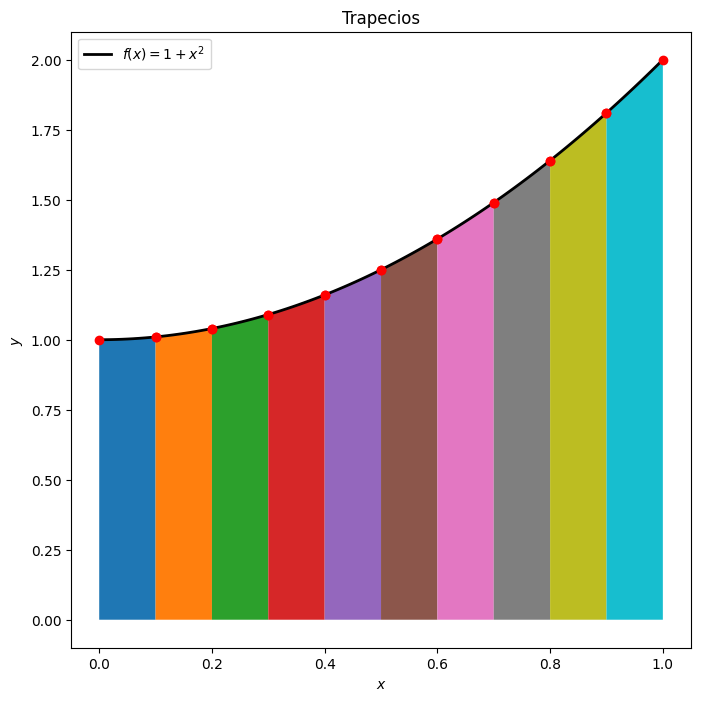

In [34]:
representa_formula_compuesta(f,0,1,10,[0,1], "Trapecios")
valor_exacto = sp.integrate(f(x), (x, 0, 1))
valor_aproximado = formula_trapecio_compuesta(f, 0, 1, 10)
print(f"- Valor exacto: {valor_exacto} = {float(valor_exacto)}")
print(f"- Aproximación: {valor_aproximado}")
print(f"- Error: {abs(valor_exacto - valor_aproximado)}")

Como vemos, la aproximación es muy cercana pero no es exacta. Codificamos ahora la comparativa con las funciones potencias sucesivas $x^i$.

In [35]:
def comparativa_Trapecio_Simpson(a, b, n, k=4):
    """
    Función que compara los errores de la aproximación de la integral utilizando el método del Trapecio y el método de Simpson.

    Args:
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n (int): Número de subintervalos. Se emplearán n+1 nodos.
        k (int): Número de exponentes a evaluar. Se evaluarán desde 0 hasta k-1.
    """

    for exp in range(0,k):
        f = lambda x: x**exp  # Función a integrar
        valor_exacto = sp.integrate(f(x), (x, a, b))
        valor_simpson = formula_simpson_compuesta(f, a, b, n)
        valor_trapecio = formula_trapecio_compuesta(f, a, b, n)

        print(f"Para f(x) = x^{exp}:")
        print(f"- Valor exacto: {valor_exacto}")
        print(f"- Trapecio compuesto: {valor_trapecio}")
        print(f"\t- Error: {abs(valor_exacto - valor_trapecio)}")
        print(f"- Simpson compuesto: {valor_simpson}")
        print(f"\t- Error: {abs(valor_exacto - valor_simpson)}")

        print(f"-"*30)

Veamos ahora qué ocurre con 100 subintervalos, para tener claramente el orden de aproximación.

In [36]:
comparativa_Trapecio_Simpson(0,1,100, k=5)

Para f(x) = x^0:
- Valor exacto: 1
- Trapecio compuesto: 1.0
	- Error: 0
- Simpson compuesto: 1.0
	- Error: 0
------------------------------
Para f(x) = x^1:
- Valor exacto: 1/2
- Trapecio compuesto: 0.5
	- Error: 0
- Simpson compuesto: 0.5
	- Error: 0
------------------------------
Para f(x) = x^2:
- Valor exacto: 1/3
- Trapecio compuesto: 0.33335000000000004
	- Error: 0.0000166666666667203
- Simpson compuesto: 0.33333333333333337
	- Error: 5.55111512312578E-17
------------------------------
Para f(x) = x^3:
- Valor exacto: 1/4
- Trapecio compuesto: 0.25002500000000005
	- Error: 0.0000250000000000528
- Simpson compuesto: 0.25
	- Error: 0
------------------------------
Para f(x) = x^4:
- Valor exacto: 1/5
- Trapecio compuesto: 0.200033333
	- Error: 0.0000333329999999965
- Simpson compuesto: 0.20000000008333338
	- Error: 8.33333679839399E-11
------------------------------


Como vemos, todo apunta a que la fórmula de los trapecios compuesta es exacta en $\mathbb{P}_1$, mientras que la fórmula de Simpson compuesta es exacta en $\mathbb{P}_3$. Esto coincide con lo visto en teoría, pero repitamos el proceso con un número mayor de subintervalos para ver si se confirma.

In [37]:
comparativa_Trapecio_Simpson(0,1,1000, k=6)

Para f(x) = x^0:
- Valor exacto: 1
- Trapecio compuesto: 1.0
	- Error: 0
- Simpson compuesto: 1.0
	- Error: 0
------------------------------
Para f(x) = x^1:
- Valor exacto: 1/2
- Trapecio compuesto: 0.5
	- Error: 0
- Simpson compuesto: 0.5
	- Error: 0
------------------------------
Para f(x) = x^2:
- Valor exacto: 1/3
- Trapecio compuesto: 0.33333349999999995
	- Error: 1.66666666634452E-7
- Simpson compuesto: 0.3333333333333333
	- Error: 0
------------------------------
Para f(x) = x^3:
- Valor exacto: 1/4
- Trapecio compuesto: 0.25000025000000003
	- Error: 2.50000000034944E-7
- Simpson compuesto: 0.25000000000000006
	- Error: 5.55111512312578E-17
------------------------------
Para f(x) = x^4:
- Valor exacto: 1/5
- Trapecio compuesto: 0.20000033333330003
	- Error: 3.33333300017724E-7
- Simpson compuesto: 0.20000000000000834
	- Error: 8.32667268468867E-15
------------------------------
Para f(x) = x^5:
- Valor exacto: 1/6
- Trapecio compuesto: 0.16666708333325
	- Error: 4.166665833471

Como vemos, en ese caso podríamos pensar que la fórmula de Simpson no es exacta en $\mathbb{P}_3$, pero esto es debido a los errores de redondeo.

## Ejercicio 9

>**Ejercicio 9:** Programar las técnicas de integración de Romberg y adaptativa, para después aplicarlas a la aproximación de la siguiente integral $$\int_a^b p(x)\, dx$$
>siendo  $\;a=\displaystyle\min_{0\leq i\leq 7}{d_i}$, $\;b=\displaystyle\max_{0\leq i\leq 7}{d_i}$ y
>$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
>(siendo $d_0, d_1, \ldots, d_7$ los dígitos de su DNI, pasaporte o tarjeta de residente).

Comenzamos con la codificación de la función de Romberg, haciendo uso de que ya tenemos la función de los trapecios compuesta. Para ello, haremos uso de la programación dinámica para evitar cálculos innecesarios. Esta programación dinámica la llevaremos a cabo mediante dos matrices:
- `R`: matriz que contendrá los valores de la aproximación de la integral.
- `Calculado`: matriz que que indicará si el valor de la aproximación de la integral ya ha sido calculado.

De esta forma, la matriz `R` contendrá:
$$
R(j,0) = T_{2^j}, \qquad R(j,k) = \dfrac{4^k R(j,k-1)-R(j-1,k-1)}{4^k-1}, j=0,\dots,N,\ \ k = 1,\dots,j.
$$

La matriz `Calculado` contendrá en la posición $(j,k)$ el valor `True` si el valor de $R(j,k)$ ya ha sido calculado, y `False` en caso contrario.

In [38]:
def calcula_R_Romberg(R, calculado, j, k, f, a, b):
    """
    Función que calcula R(j, k) para una función f en un intervalo [a, b]
    Args:
        R (matriz): Matriz donde se almacenan los valores de R(j, k).
        calculado (matriz): Matriz de booleanos que indica si R(j, k) ya ha sido calculado.
        j (int): Índice de la fila de la matriz R.
        k (int): Índice de la columna de la matriz R.
        f (function): Función cuya integral se va a aproximar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
    Returns:
        mat: Matriz R actualizada con el valor de R(j, k).
        mat: Matriz de booleanos actualizada.
    """

    if calculado[j][k]:
        return R, calculado
    
    # Si no está calculado, lo calculamos recursivamente
    if k == 0:
        R[j][k] = formula_trapecio_compuesta(f, a, b, 2**j)
    else:
        R, calculado = calcula_R_Romberg(R, calculado, j, k-1, f, a, b)
        R, calculado = calcula_R_Romberg(R, calculado, j-1, k-1, f, a, b)
        R[j][k] = (4**k * R[j][k-1] - R[j-1][k-1]) / (4**k - 1)

    calculado[j][k] = True
    return R, calculado


Una vez tenemos esta función calculadada, podemos emplearla para codificar la función de integración de Romberg.

In [39]:
def Romberg(f, a, b, tol=1e-6):
    """
    Función que calcula la integral numérica de una función en un intervalo dado utilizando el método de Romberg.

    Args:
        f (function): Función cuya integral se va a aproximar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        tol (float): Tolerancia para el error. Por defecto es 1e-6.

    Returns:
        float: Valor aproximado de la integral en el intervalo [a, b].
        matriz: Matriz R con los valores de R(j, k).
        matriz: Matriz de booleanos que indica si R(j, k) ya ha sido calculado.
    """

    n = 0
    R = [[0]]
    calculado = [[False]]
    R, calculado = calcula_R_Romberg(R, calculado, 0, 0, f, a, b)
    x_n = R[0][0]

    
    n += 1
    x_ant = x_n
    R.append([0] * (n + 1))
    calculado.append([False] * (n + 1))
    R, calculado = calcula_R_Romberg(R, calculado, n, n, f, a, b)
    x_n = R[n][n]

    while (abs(x_n - x_ant) > tol):
        n += 1
        x_ant = x_n
        R.append([0] * (n + 1))
        calculado.append([False] * (n + 1))
        R, calculado = calcula_R_Romberg(R, calculado, n, n, f, a, b)
        x_n = R[n][n]

    
    return x_n,R,calculado


Veamos que efectivamente funciona con el siguiente ejemplo.

In [40]:
f = lambda x: 1/(1 + x**2)

valor_exacto = sp.integrate(f(x), (x, -5, 5))
valor_aproximado, R, calculado = Romberg(f, -5, 5)
print(f"- Valor exacto: {valor_exacto} = {float(valor_exacto)}")
print(f"- Aproximación: {valor_aproximado}")

# Imprimir la matriz R
print("\nMatriz R de integración de Romberg:")
for i in range(len(R)):
    for j in range(len(R[i])):
        if calculado[i][j]:
            print(f"{R[i][j]:<10.6f}", end=' ')
        else:
            print("X         ", end=' ')
    print()

- Valor exacto: 2*atan(5) = 2.746801533890032
- Aproximación: 2.7468015343460155

Matriz R de integración de Romberg:
0.384615   
5.192308   6.794872   
3.285809   2.650309   2.374005   
2.784489   2.617383   2.615188   2.619016   
2.746112   2.733319   2.741048   2.743046   2.743532   
2.746561   2.746711   2.747603   2.747708   2.747726   2.747730   
2.746741   2.746801   2.746808   2.746795   2.746791   2.746790   2.746790   
2.746786   2.746802   2.746802   2.746801   2.746801   2.746801   2.746801   2.746801   
2.746798   2.746802   2.746802   2.746802   2.746802   2.746802   2.746802   2.746802   2.746802   


Codificamos ahora la función de integración adaptativa, que tiene un claro carácter recursivo.

In [41]:
def IntegracionAdaptativa(f, a, b, tol=1e-6):
    """
    Función que calcula la integral numérica de una función en un intervalo dado utilizando el método de integración adaptativa.

    Args:
        f (function): Función cuya integral se va a aproximar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        tol (float): Tolerancia para el error. Por defecto es 1e-6.

    Returns:
        float: Valor aproximado de la integral en el intervalo [a, b].
    """

    m = (a + b) / 2  # Punto medio del intervalo
    S_a_b = formula_simpson_compuesta(f, a, b, 1)
    S_a_m = formula_simpson_compuesta(f, a, m, 1)
    S_m_b = formula_simpson_compuesta(f, m, b, 1)

    if (abs(S_a_b - (S_a_m + S_m_b)) < tol):
        return S_a_b
    else:
        return IntegracionAdaptativa(f, a, m, tol/2) + IntegracionAdaptativa(f, m, b, tol/2)


In [42]:
valor_exacto = sp.integrate(f(x), (x, -5, 5))
valor_aproximado = IntegracionAdaptativa(f, -5, 5)
print(f"- Valor exacto: {valor_exacto} = {float(valor_exacto)}")
print(f"- Aproximación: {valor_aproximado}")

- Valor exacto: 2*atan(5) = 2.746801533890032
- Aproximación: 2.746801737292458


Comprobamos ahora el funcionamiento de la función con el ejemplo propuesto. Al igual que hicimos con la primera práctica, empleamos el método de Newton-Horner para evaluar el polinomio.

In [43]:
def NewtonHorner (coeficientes, x):
    """
    Método de Horner para evaluar un polinomio.

    Args:
        coeficientes (list): Coeficientes del polinomio.
        x (float): Valor en el que se evalúa el polinomio.

    Returns:
        float: Valor del polinomio evaluado en x.
    """
    resultado_f = coeficientes[0]
    for i in range(1, len(coeficientes)):
        resultado_f = resultado_f * x + coeficientes[i]
    return resultado_f

In [ ]:
DNI = [0,1,2,3,4,5,6,7]
def f(x):
    """
    Función para calcular numéricamente el polinomio formado por los dígitos del DNI
    """
    return NewtonHorner(DNI[::-1],x)

Comprobamos ahora por tanto el funcionamiento de ambos métodos de integración con el ejemplo propuesto. Como vemos, ambos métodos convergen a un valor muy cercano al valor real de la integral, aunque el método adaptativo es más preciso.

In [49]:
a = min(DNI)
b = max(DNI)
romberg, _, _ = Romberg(f, a,b)
adaptativa = IntegracionAdaptativa(f, a,b)
valor_exacto = sp.integrate(f(x), (x, a, b))

print(f"- Valor exacto: {valor_exacto} = {float(valor_exacto)}")
print(f"\t - Error: {abs(valor_exacto - romberg)}")
print(f"- Aproximación de Romberg: {romberg}")
print(f"\t - Error: {abs(valor_exacto - adaptativa)}")
print(f"- Aproximación de Integración Adaptativa: {adaptativa}")
print(f"\t - Error: {abs(valor_exacto - adaptativa)}")


- Valor exacto: 1341509113/120 = 11179242.608333332
	 - Error: 1.86264514923096E-9
- Aproximación de Romberg: 11179242.608333334
	 - Error: 3.74391674995422E-7
- Aproximación de Integración Adaptativa: 11179242.608333707
	 - Error: 3.74391674995422E-7


## Ejercicio 10

> **Ejercicio 10:** Calcule la misma integral del ejercicio 9 pero utilizando la orden `quad` y compare los resultados de la integración Romberg y adaptativa manuales con los de la orden `quad`.

In [54]:
from scipy.integrate import quad, dblquad, tplquad

val, abserr = quad(f, a, b)
print(f"- Aproximación Numérica de Scipy: {adaptativa}")
print(f"\t- Error:                              {abs(valor_exacto - val)}")
print(f"\t- Cota del Error:                     {abserr}")
print(f"\t- Dif. con Romberg:                   {abs(romberg - val)}")
print(f"\t- Dif. con Integración Adaptativa:    {abs(adaptativa - val)}")

- Aproximación Numérica de Scipy: 11179242.608333707
	- Error:                              1.86264514923096E-9
	- Cota del Error:                     1.2411452541642254e-07
	- Dif. con Romberg:                   3.725290298461914e-09
	- Dif. con Integración Adaptativa:    3.762543201446533e-07


Vemos que las tres opciones son muy precisas, aunque la Integración Adaptativa difiere ligeramente de las otras dos.